In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print(f"Saving figure{fig_id}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi/2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise + np.random.randn(m)/2
X[:, 1] = np.sin(angles)*0.7 + noise*np.random.randn(m)/2
X[:, 2] = X[:, 0]*w1 + X[:, 1]*w2 + noise *np.random.randn(m)

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [4]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [5]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [7]:
X2D_using_svd = X2D

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [9]:
X2D[:5]

array([[ 1.34162017,  0.50619787],
       [-0.38183495, -0.2795974 ],
       [ 0.8272338 ,  0.53831144],
       [ 1.7658162 , -0.4200544 ],
       [ 0.7734628 , -0.1941864 ]])

In [10]:
X2D_using_svd[:5]

array([[-1.34162017, -0.50619787],
       [ 0.38183495,  0.2795974 ],
       [-0.8272338 , -0.53831144],
       [-1.7658162 ,  0.4200544 ],
       [-0.7734628 ,  0.1941864 ]])

In [11]:
np.allclose(X2D, -X2D_using_svd)

True

In [12]:
X3D_inv = pca.inverse_transform(X2D)

In [13]:
np.allclose(X3D_inv, X)

False

In [16]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.009668018502788363

In [17]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

In [18]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

In [19]:
pca.components_

array([[-0.96482228, -0.2197569 , -0.14430826],
       [ 0.25442626, -0.9187385 , -0.30197159]])

In [20]:
Vt[:2]

array([[ 0.96482228,  0.2197569 ,  0.14430826],
       [-0.25442626,  0.9187385 ,  0.30197159]])

In [21]:
pca.explained_variance_

array([0.87686721, 0.16203183])

In [22]:
1 - pca.explained_variance_ratio_.sum()

0.009375029409348978

In [23]:
np.square(s) / np.square(s).sum()

array([0.83612221, 0.15450276, 0.00937503])

In [33]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

Saving figureswiss_roll_plot


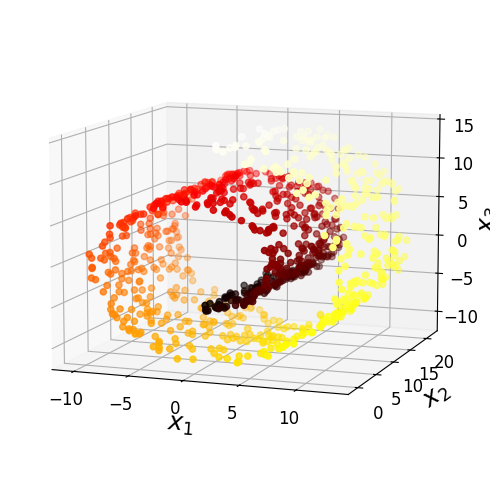

In [34]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("swiss_roll_plot")
plt.show()

Saving figuresquished_swiss_roll_plot


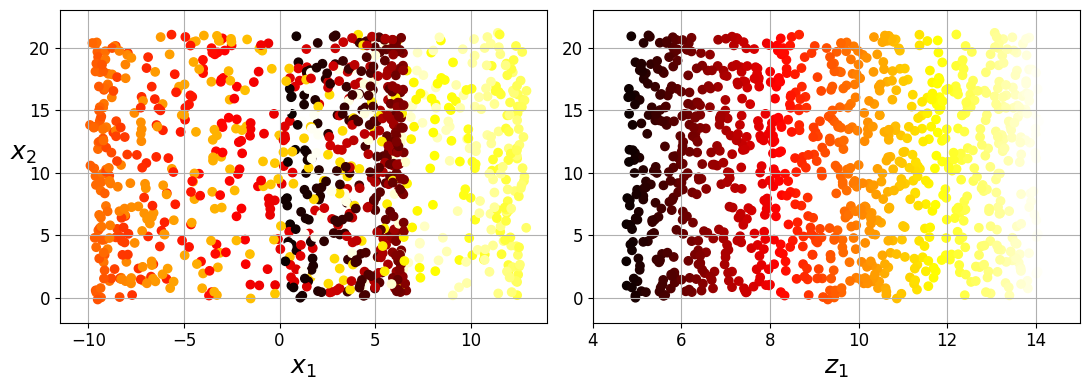

In [35]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("squished_swiss_roll_plot")
plt.show()